# Projet 4 : Prédiction de la consommation d'électricité
## Exploration
### Objectifs : - prédire les émissions de CO2 et la consommation totale d’énergie (2 variables à prédire)
### Objectif : - évaluer la pertinence de la variable ENERGY STAR Score
### Note à Seattle, le record en nombre d'étages c'est 76 selon wikipedia

### Notes : 
    - Après lecture du dictionnaire des données, les variables redondantes utilisées pour faire des l'imputation puis seront retirées (expression dans une autre unité).
    - Nos variables d'intérets sont: ENERGYSTARScore, TotalGHGEmissions, SiteEnergyUse(kBtu)

In [2]:
#librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

In [3]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [4]:
dm = pd.read_csv('data_explo.csv')

In [5]:
dm.shape

(3432, 39)

In [6]:
dm.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude
0,1,2016,NONRESIDENTIAL,HOTEL,Mayflower park hotel,0659000030,405 Olive way Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1927,1.0,12.0,88434.0,0.0,88434.0,Hotel,HOTEL,88434.0,NAN,NaN,NAN,NaN,NaN,60.0,7103895.25,2003882.00,3946027.0,1276453.0,NaN,249.705,0,NaN,COMPLIANT,405 Olive way,Seattle,WA,98101.0,47.61220,-122.33799
1,2,2016,NONRESIDENTIAL,HOTEL,Paramount Hotel,0659000220,724 Pine street Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1996,1.0,11.0,103566.0,15064.0,88502.0,"Hotel, Parking, Restaurant",HOTEL,83880.0,PARKING,15064.0,RESTAURANT,4622.0,NaN,61.0,8371084.00,0.00,3242851.0,5145082.0,NaN,279.685,0,NaN,COMPLIANT,724 Pine street,Seattle,WA,98101.0,47.61317,-122.33393
2,3,2016,NONRESIDENTIAL,HOTEL,5673-The Westin Seattle,0659000475,1900 5th Avenue Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1969,1.0,41.0,959050.0,98359.0,860691.0,Hotel,HOTEL,756868.0,NAN,100000.0,NAN,0.0,NaN,43.0,72858840.00,21566554.00,49526664.0,1493800.0,NaN,2075.380,0,NaN,COMPLIANT,1900 5th Avenue,Seattle,WA,98101.0,47.61393,-122.33810
3,5,2016,NONRESIDENTIAL,HOTEL,HOTEL MAX,0659000640,620 STEWART ST Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1926,1.0,10.0,61320.0,0.0,61320.0,Hotel,HOTEL,61320.0,NAN,NaN,NAN,NaN,NaN,56.0,17511952.00,2214446.25,2768924.0,1811213.0,NaN,1111.385,0,NaN,COMPLIANT,620 STEWART ST,Seattle,WA,98101.0,47.61412,-122.33664
4,8,2016,NONRESIDENTIAL,HOTEL,WARWICK SEATTLE HOTEL (ID8),0659000970,401 LENORA ST Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1980,1.0,18.0,147735.0,37230.0,110505.0,"Hotel, Parking, Swimming Pool",HOTEL,123445.0,PARKING,68009.0,SWIMMING POOL,0.0,NaN,75.0,14500852.50,0.00,5368607.0,8803998.0,NaN,506.355,0,NaN,COMPLIANT,401 LENORA ST,Seattle,WA,98121.0,47.61375,-122.34047


In [7]:
#importation groupe de varibales
import json
with open('group_var_explo.txt', 'r') as f:
    groupe = json.load(f)

In [8]:
#Rappel du contenu des groupes
for nom, valeur in groupe.items():
    print(nom, ' : ', valeur)

var_id  :  ['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber']
var_quant  :  ['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
var_cat  :  ['CouncilDistrictCode', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'DefaultData', 'ComplianceStatus']
var_obj  :  ['ListOfAllPropertyUseTypes']
var_adress  :  ['Latitude', 'Longitude']
var_target  :  ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']


In [9]:
for nom, valeur in groupe.items():
    exec(f'{nom} = {valeur}')

In [10]:
#var_target = 'SiteEnergyUse(kBtu)'

In [11]:
var_quant.remove('PropertyGFAParking')
var_quant

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

### splitting preprocessing

#### Notes : Data will be preprocessed in the aim to get a training set most representative

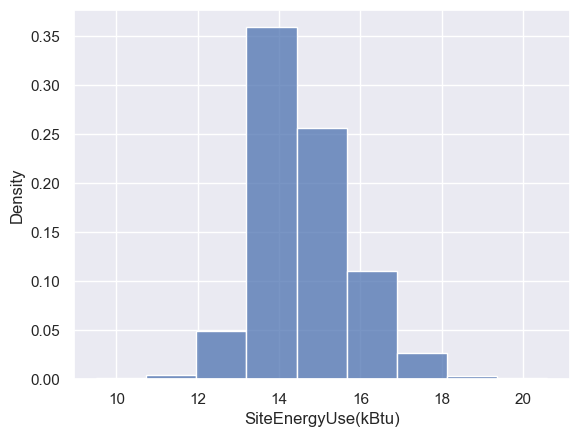

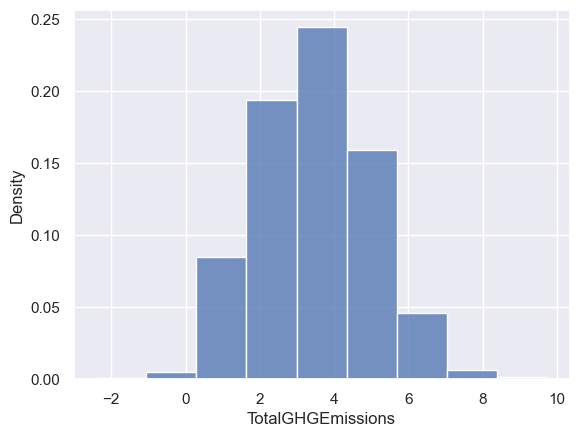

In [12]:
for col in var_target:
    plt.figure()
    sns.histplot(np.log(dm[col]), stat ='density', bins=9)
    plt.show()

#### Notes : 9 bins seems a good tradeoff. We get a plot close to gaussisan distribtution

In [13]:
pd.Series([np.nan,10]).mean()

10.0

In [14]:
dm['group'] = pd.cut(np.log(dm[var_target[0]]), bins=9, labels=[1,2,3,4,5,6,7,8,9])
dm['group'] = np.where(dm['group'].isna(), 10, dm['group'])

In [15]:
dm['group'].value_counts()

4.0     1516
5.0     1083
6.0      465
3.0      208
7.0      114
2.0       19
8.0       14
9.0        5
10.0       4
1.0        4
Name: group, dtype: int64

In [16]:
dm['group'].value_counts(normalize=True)*100

4.0     44.172494
5.0     31.555944
6.0     13.548951
3.0      6.060606
7.0      3.321678
2.0      0.553613
8.0      0.407925
9.0      0.145688
10.0     0.116550
1.0      0.116550
Name: group, dtype: float64

In [17]:
## Only 0.11% of instances(group 10) has na as value for target variable

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
df_train, df_test = train_test_split(dm, test_size=0.2, stratify=dm['group'], random_state=3)

In [19]:
dm[[var_target[0]]+var_quant].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SiteEnergyUse(kBtu)              3428 non-null   float64
 1   YearBuilt                        3432 non-null   int64  
 2   NumberofBuildings                3431 non-null   float64
 3   NumberofFloors                   3415 non-null   float64
 4   PropertyGFATotal                 3432 non-null   float64
 5   PropertyGFABuilding(s)           3432 non-null   float64
 6   LargestPropertyUseTypeGFA        3402 non-null   float64
 7   SecondLargestPropertyUseTypeGFA  1704 non-null   float64
 8   ThirdLargestPropertyUseTypeGFA   607 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 241.4 KB


In [20]:
def imputation_var_qaunt(df, target, var_quant):
    #Deleting nan in target + constant imputer / mean filling
    df = df.dropna(subset=[target])
    #df.loc[:,var_quant] = df[var_quant].fillna(0) #0.24748172444549316
    #df.loc[:,var_quant] = df[var_quant].fillna(1) #0.18045426303198944
    mean_imp = SimpleImputer(strategy='mean')
    df.loc[:,var_quant] = mean_imp.fit_transform(df[var_quant]) #0.2478691762385683
    
    #Filling all missing by a value
    #df = df.fillna(0) #-0.02411149306155791
    #df = df.fillna(-1) #-0.4907763908689512
    #df = df.fillna(500) #-0.20175677013144716
    
    #Filling by mean
    #mean_imp = SimpleImputer(strategy='mean')
    #df.loc[:,var_quant+[var_target[0]]] = mean_imp.fit_transform(df[var_quant+[var_target[0]]]) #-0.3752956997488438
    return df

def features_eng_var_quant(df, target, var_quant):
    df = df.loc[:,[target]+var_quant]
    df.iloc[:,[0,4,5,6,7,8]] = np.log(1+df.iloc[:,[0,4,5,6,7,8]])
    return df
    
def preprocessing_quant(df, target, features_quant = None):
    dfx = df.copy()
    dfx = imputation_var_qaunt(dfx, target, features_quant)
    dfx = features_eng_var_quant(dfx, target, var_quant) # Amélioration
    Y = dfx[target]
    if features_quant!=None:
        X = dfx[features_quant]
    else: X = dfx.drop(target, axis=1)
    return X,Y

In [21]:
x_train, y_train = preprocessing_quant(df_train, var_target[0], var_quant)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [22]:
x_train

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
1368,1949.0,1.0,1.0,10.626727,10.626727,10.839944,10.247437,9.309721
174,1909.0,1.0,6.0,10.858557,10.858557,10.826774,10.247437,9.309721
2720,2008.0,1.0,4.0,12.161216,11.053696,12.610347,11.760184,8.791638
3379,2015.0,2.0,6.0,12.513274,12.189887,12.109507,11.163283,9.309721
3207,2011.0,1.0,5.0,11.851217,11.777925,11.590812,9.847658,9.614204
...,...,...,...,...,...,...,...,...
2764,1900.0,1.0,3.0,10.020426,10.020426,9.287394,9.287394,8.881975
1252,1928.0,1.0,4.0,10.326334,10.326334,9.655667,8.716863,9.309721
2593,1917.0,1.0,3.0,10.006089,10.006089,10.006089,10.247437,9.309721
1048,1955.0,1.0,2.0,10.385945,10.385945,10.395161,10.247437,9.309721


In [23]:
#### Impuation Optimisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
model_tree = cross_validate(DecisionTreeRegressor(random_state=3), x_train, y_train, cv=5, scoring='r2')
model_tree['test_score'].mean()

0.39484125463256303

In [24]:
xtrain, ytrain = preprocessing_quant(df_train, var_target[0], var_quant)
xtest, ytest = preprocessing_quant(df_test, var_target[0], var_quant)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [25]:
#### Standardisation
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scy = StandardScaler()

xtrain.loc[:,:] = scx.fit_transform(xtrain)
xtest.loc[:,:]  = scx.transform(xtest)

ytrain = scy.fit_transform(ytrain.values.reshape(-1, 1)).ravel()
ytest = scy.transform(ytest.values.reshape(-1, 1)).ravel()

In [26]:
# Model libraires
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

models={'Regression':GridSearchCV(LinearRegression(),{},
                                  cv=5, n_jobs=4, ),
        'Ridge':GridSearchCV(Ridge(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'Lasso':GridSearchCV(Lasso(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'TreeReg':GridSearchCV(DecisionTreeRegressor(random_state=3),{'min_samples_leaf':range(20,61,2)},
                               cv=5,n_jobs=4, ),
        'Forest_reg':GridSearchCV(RandomForestRegressor(random_state=3),{'min_samples_leaf':range(2,41,2), 'n_estimators':range(85,97)},
                                   cv=5,n_jobs=6,),
        'knn_reg':GridSearchCV(KNeighborsRegressor(),{'n_neighbors':range(5,97,5)},
                                   cv=5,n_jobs=6,)
       }
scores = {'R2':'r2', 'MAE':'neg_mean_absolute_error', 'RMSE':'neg_mean_absolute_error'}

Regression
{} 

LinearRegression() 

R2 : 0.6456440062682276 

MAE : -0.429060938314607 

RMSE : -0.429060938314607 



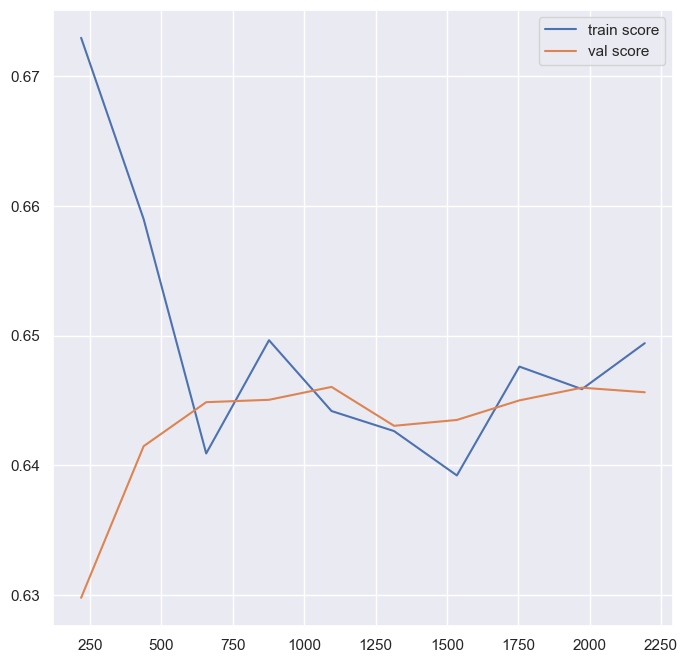

Ridge
{'alpha': 0.001} 

Ridge(alpha=0.001) 

R2 : 0.6456437973089534 

MAE : -0.42906106805546057 

RMSE : -0.42906106805546057 



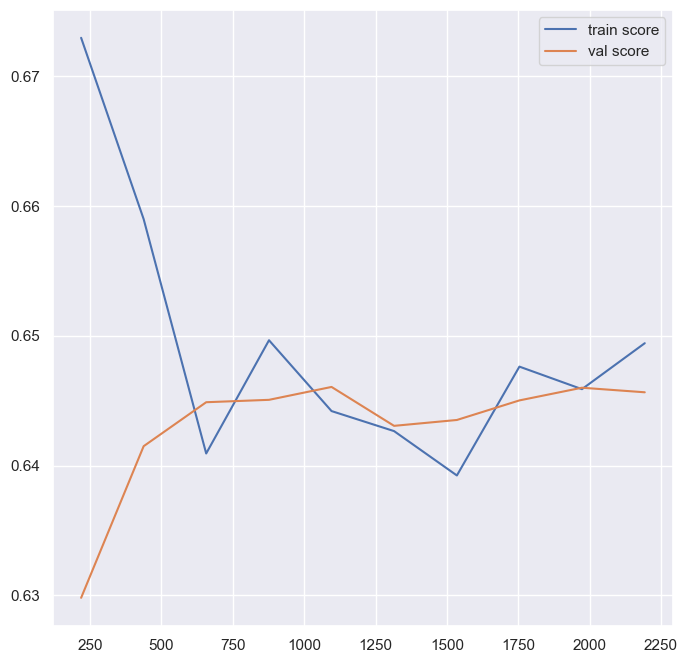

Lasso
{'alpha': 0.004641588833612777} 

Lasso(alpha=0.004641588833612777) 

R2 : 0.6457694202485862 

MAE : -0.42955487971897244 

RMSE : -0.42955487971897244 



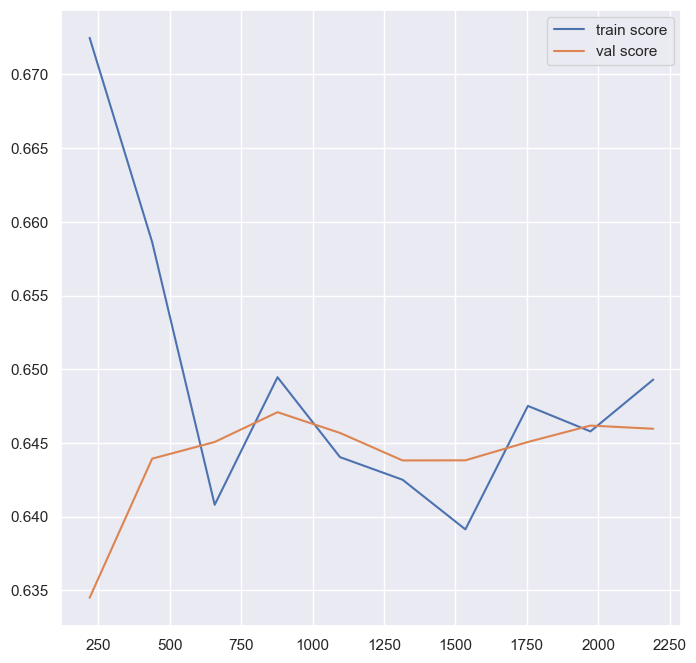

TreeReg
{'min_samples_leaf': 52} 

DecisionTreeRegressor(min_samples_leaf=52, random_state=3) 

R2 : 0.6387786817770865 

MAE : -0.4282639176271874 

RMSE : -0.4282639176271874 



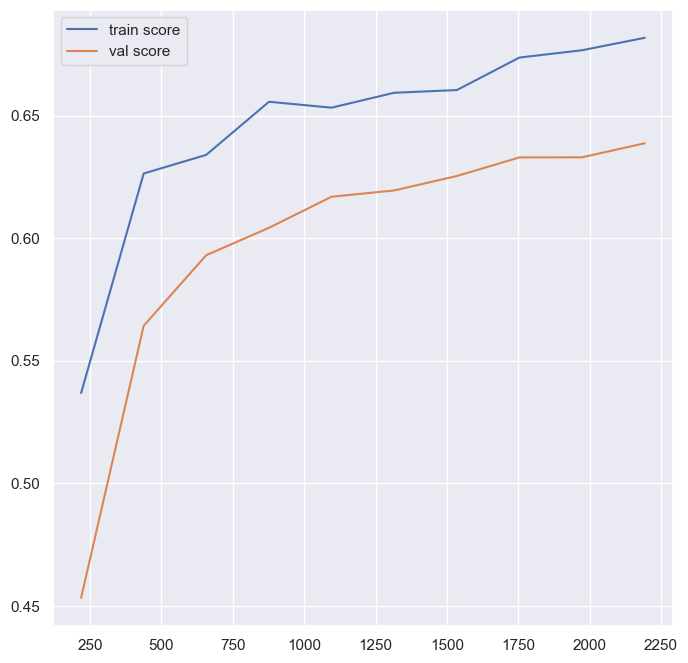

Forest_reg
{'min_samples_leaf': 8, 'n_estimators': 91} 

RandomForestRegressor(min_samples_leaf=8, n_estimators=91, random_state=3) 

R2 : 0.6651418794503339 

MAE : -0.4086461020533278 

RMSE : -0.4086461020533278 



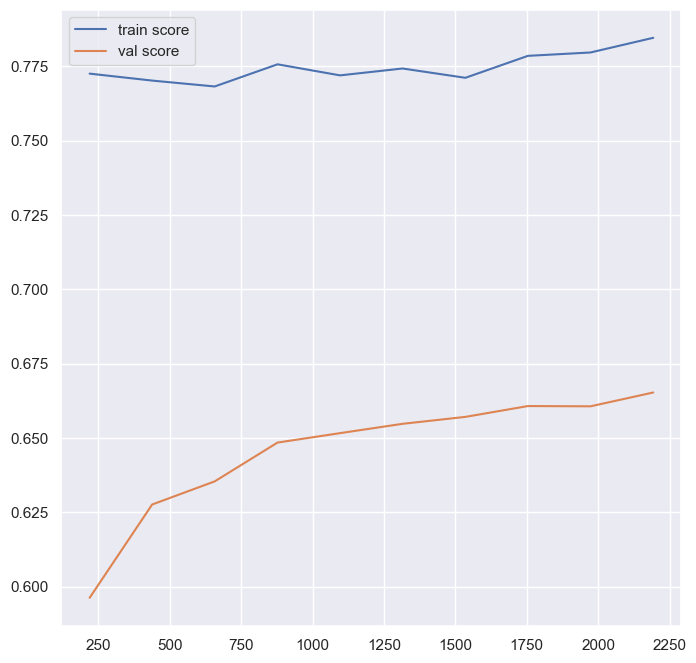

knn_reg
{'n_neighbors': 15} 

KNeighborsRegressor(n_neighbors=15) 

R2 : 0.6409364527324433 

MAE : -0.4186606563865345 

RMSE : -0.4186606563865345 



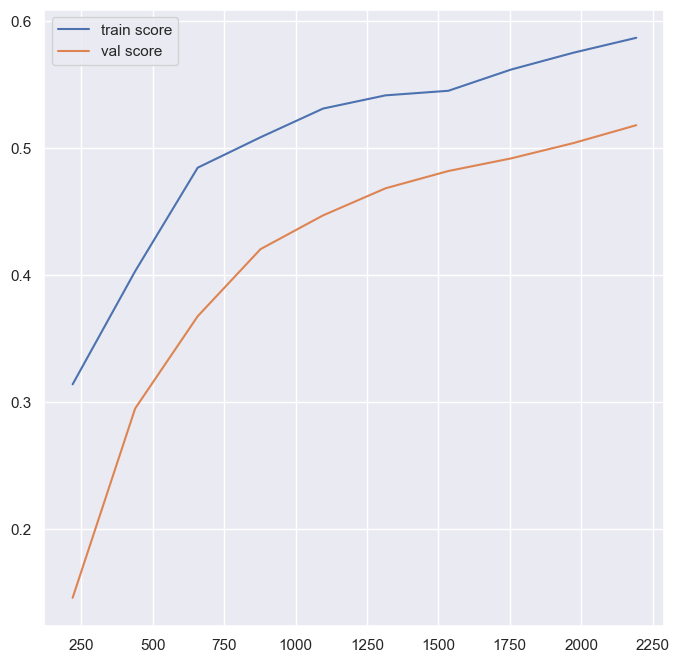

In [27]:
for model in models:
    print(model)
    models[model].fit(xtrain,ytrain)
    print(models[model].best_params_, '\n')
    print(models[model].best_estimator_, '\n')
    resultat = cross_validate(models[model].best_estimator_,xtrain, ytrain, cv=5, scoring=scores)
                              
    print('R2 :', resultat['test_R2'].mean(),'\n')
    print('MAE :', resultat['test_MAE'].mean(),'\n')
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    
    N, train_score, val_score = learning_curve(models[model].best_estimator_, x_train, y_train, cv= 5,
                                           scoring = 'r2',
                                          train_sizes = np.linspace(0.1, 1, 10))

    plt.figure(figsize=(8,8))
    plt.plot(N, train_score.mean(axis = 1), label='train score')
    plt.plot(N, val_score.mean(axis = 1), label='val score')
    plt.legend()
    plt.show()

#### Meilleurs combinaisons de variables quant

In [28]:
from sklearn.feature_selection import RFECV

var_retenus_quant = []
score_finale = []

for model in models:
    if model == 'knn_reg': 
        break
    print(model)
    
    selector=RFECV(models[model].best_estimator_,cv=5, scoring='r2', n_jobs=5)
    selector = selector.fit(xtrain, ytrain)
    
    vars = xtrain.columns[selector.support_]
    print(vars)
    var_retenus_quant.append(vars.tolist())
    
    resultat = cross_validate(models[model].best_estimator_,xtrain[vars], ytrain, cv=5, scoring=scores)
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    score_finale.append({'R2':resultat['test_R2'].mean(), 'MAE':resultat['test_MAE'].mean(),'RMSE':resultat['test_RMSE'].mean()})
    
    resultat = cross_validate(models['knn_reg'].best_estimator_,xtrain[vars], ytrain, cv=5, scoring=scores)
    print('Avec kNN')
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')

Regression
Index(['YearBuilt', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')
R2 : 0.6456776951325865
MAE : -0.42905651924092963
RMSE : -0.42905651924092963 

Avec kNN
R2 : 0.6344427864663988
MAE : -0.4285118018468429
RMSE : -0.4285118018468429 

Ridge
Index(['YearBuilt', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')
R2 : 0.6456774846079573
MAE : -0.4290566499065382
RMSE : -0.4290566499065382 

Avec kNN
R2 : 0.6344427864663988
MAE : -0.4285118018468429
RMSE : -0.4285118018468429 

Lasso
Index(['YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestP

#### Notes: les forêts aléatoires produisent les meilleurs performances

#### Modelisation with only cat variables

In [29]:
def cat_features_eng(df, target, features_cat):
    df = df.loc[:,[target]+features_cat]
    df.loc[:, features_cat] = df[features_cat].replace('NAN', np.nan)
    df.loc[:, features_cat] = df[features_cat].replace('NaN', np.nan)
    
    df['ComplianceStatus'].where(df['ComplianceStatus'] == 'COMPLIANT', 'NON_COMPLIANT', inplace=True)

    #df.loc[:,'ThirdLargestPropertyUseType'] = np.where(df['ThirdLargestPropertyUseType'].isna(),'NC',df['ThirdLargestPropertyUseType'])
    df.loc[:,'ThirdLargestPropertyUseType'] = np.where(df['ThirdLargestPropertyUseType'].isin(['RETAIL STORE','OFFICE','PARKING','RESTAURANT',np.nan]),df['ThirdLargestPropertyUseType'], 'OTHER')

    #df.loc[:,'SecondLargestPropertyUseType'] = np.where(df['SecondLargestPropertyUseType'].isna(),'NC', df['SecondLargestPropertyUseType'])
    df.loc[:,'SecondLargestPropertyUseType'] = np.where(df['SecondLargestPropertyUseType'].isin(['PARKING','OFFICE','RETAIL STORE', np.nan]), df['SecondLargestPropertyUseType'], 'OTHER')

    df.loc[:,'LargestPropertyUseType'] = np.where(df['LargestPropertyUseType'].isin(['MULTIFAMILY HOUSING','OFFICE','NON-REFRIGERATED WAREHOUSE','K-12 SCHOOL', np.nan]), df['SecondLargestPropertyUseType'], 'OTHER')

    df.loc[:,'PrimaryPropertyType'] = np.where(df['PrimaryPropertyType'].isin(['LOW-RISE MULTIFAMILY','MID-RISE MULTIFAMILY','SMALL- AND MID-SIZED OFFICE', np.nan]), df['PrimaryPropertyType'], 'OTHER')

    df['Neighborhood'].where(df['Neighborhood'] != 'DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
    
    return df

def var_dummy(df, features_cat):
    modalite_to_del = []
    for col in features_cat:
        low_i = df[col].value_counts().argmin()
        low = df[col].value_counts().index[low_i]
        modalite_to_del.append(col+'_'+str(low))
        
    df = pd.get_dummies(df, prefix=features_cat, columns=features_cat)
    #Suppression de des modalités les moins fréquentes
    for col in modalite_to_del:
        df.drop(col, axis=1, inplace=True)
    return df

def imputation_cat(df,target):
    ##### Variables qaunt ########
    imp_most = SimpleImputer(missing_values=np.nan, strategy='most_frequent', add_indicator=False)  #0.049444603639382634
    df.loc[:,df.columns[df.columns!=target]] = imp_most.fit_transform(df.loc[:,df.columns[df.columns!=target]])
    return df

def first_preprocessing_var_cat(df,target, features_cat):
    dfx = df.copy()
    dfx = cat_features_eng(dfx, target, features_cat)
    dfx = imputation_cat(dfx, target)   
    dfx = var_dummy(dfx, features_cat)
    return dfx

def last_preprocessing_var_cat(df, target, features_cat):
    dfx = df.copy()
    dfx = dfx.dropna(subset=[target])
    dfx.loc[:,[target]] = np.log(1+dfx.loc[:,[target]])
    X = dfx.drop(target, axis=1)
    y = dfx[target].values.reshape((-1,1))
    
    return X,y

In [30]:
dm_prime = first_preprocessing_var_cat(dm, var_target[0], var_cat)
df_train, df_test = train_test_split(dm_prime, test_size=0.2, stratify=dm['group'], random_state=3)

In [31]:
df_train.iloc[:,1:].isna().sum()

CouncilDistrictCode_1                       0
CouncilDistrictCode_2                       0
CouncilDistrictCode_3                       0
CouncilDistrictCode_4                       0
CouncilDistrictCode_5                       0
CouncilDistrictCode_7                       0
BuildingType_CAMPUS                         0
BuildingType_MULTIFAMILY HR (10+)           0
BuildingType_MULTIFAMILY LR (1-4)           0
BuildingType_MULTIFAMILY MR (5-9)           0
BuildingType_NONRESIDENTIAL                 0
BuildingType_NONRESIDENTIAL COS             0
BuildingType_SPS-DISTRICT K-12              0
PrimaryPropertyType_LOW-RISE MULTIFAMILY    0
PrimaryPropertyType_MID-RISE MULTIFAMILY    0
PrimaryPropertyType_OTHER                   0
Neighborhood_BALLARD                        0
Neighborhood_CENTRAL                        0
Neighborhood_DOWNTOWN                       0
Neighborhood_EAST                           0
Neighborhood_GREATER DUWAMISH               0
Neighborhood_LAKE UNION           

In [32]:
df_test

,SiteEnergyUse(kBtu),CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_7,BuildingType_CAMPUS,BuildingType_MULTIFAMILY HR (10+),BuildingType_MULTIFAMILY LR (1-4),BuildingType_MULTIFAMILY MR (5-9),BuildingType_NONRESIDENTIAL,BuildingType_NONRESIDENTIAL COS,BuildingType_SPS-DISTRICT K-12,PrimaryPropertyType_LOW-RISE MULTIFAMILY,PrimaryPropertyType_MID-RISE MULTIFAMILY,PrimaryPropertyType_OTHER,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_OTHER,LargestPropertyUseType_PARKING,LargestPropertyUseType_RETAIL STORE,SecondLargestPropertyUseType_OFFICE,SecondLargestPropertyUseType_OTHER,SecondLargestPropertyUseType_PARKING,ThirdLargestPropertyUseType_OFFICE,ThirdLargestPropertyUseType_OTHER,ThirdLargestPropertyUseType_PARKING,ThirdLargestPropertyUseType_RETAIL STORE,DefaultData_0,ComplianceStatus_COMPLIANT
263,2.886254e+07,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1
1474,1.695116e+06,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
648,1.976667e+06,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
440,2.028861e+06,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
3007,5.612038e+05,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,5.101595e+05,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1
120,3.295872e+06,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1
2355,1.222452e+06,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1
301,1.262698e+07,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1


In [33]:
xtrain, ytrain = last_preprocessing_var_cat(df_train, var_target[0], var_cat)
xtest, ytest = last_preprocessing_var_cat(df_test, var_target[0], var_cat)

In [34]:
ytrain

array([[14.62499462],
       [15.21516641],
       [16.00699301],
       ...,
       [13.353678  ],
       [12.20605765],
       [14.92738584]])

In [35]:
#### Standardisation
from sklearn.preprocessing import StandardScaler

scy = StandardScaler()
ytrain = scy.fit_transform(ytrain.reshape(-1, 1)).ravel()
ytest = scy.transform(ytest.reshape(-1, 1)).ravel()

In [36]:
# Model libraires
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve

models={'Regression':GridSearchCV(LinearRegression(),{},
                                  cv=5, n_jobs=4, ),
        'Ridge':GridSearchCV(Ridge(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'Lasso':GridSearchCV(Lasso(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'TreeReg':GridSearchCV(DecisionTreeRegressor(random_state=3),{'min_samples_leaf':range(2,21,2)},
                               cv=5,n_jobs=4, ),
        'Forest_reg':GridSearchCV(RandomForestRegressor(random_state=3),{'min_samples_leaf':range(2,41,2), 'n_estimators':range(85,97)},
                                  cv=5,n_jobs=6,),
        
        'knn_reg':GridSearchCV(KNeighborsRegressor(),{'n_neighbors':range(5,97,5)},
                                   cv=5,n_jobs=6,)
       }
scores = {'R2':'r2', 'MAE':'neg_mean_absolute_error', 'RMSE':'neg_mean_absolute_error'}

Regression
{} 

LinearRegression() 

R2 : 0.28452506972070246 

MAE : -0.6388808990445989 

RMSE : -0.6388808990445989 



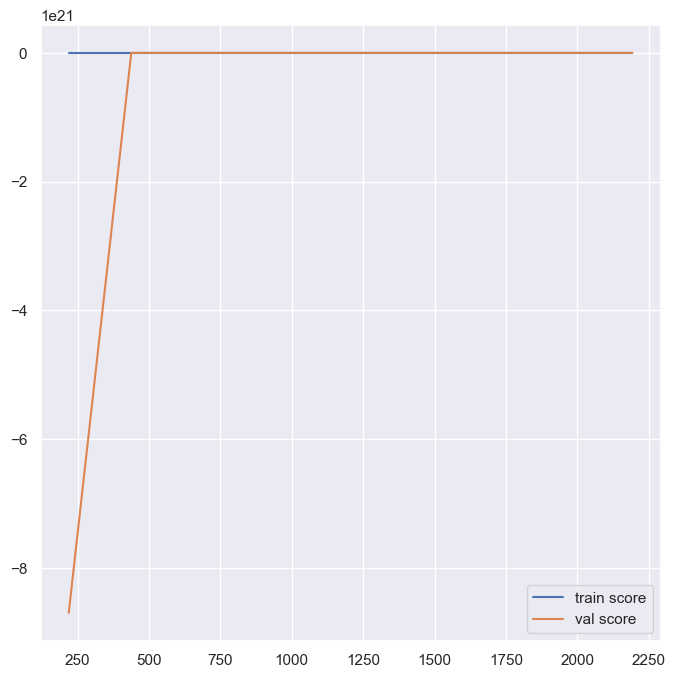

Ridge
{'alpha': 2.154434690031882} 

Ridge(alpha=2.154434690031882) 

R2 : 0.2854231832121186 

MAE : -0.6386143248119678 

RMSE : -0.6386143248119678 



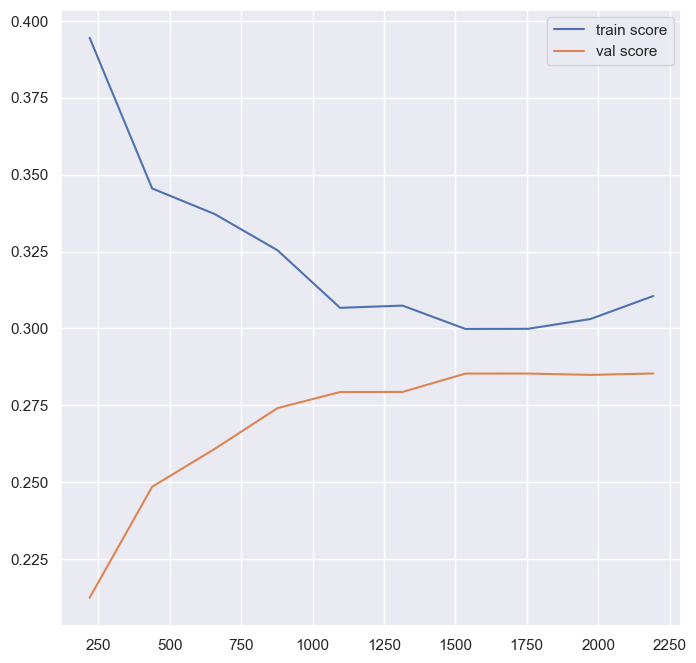

Lasso
{'alpha': 0.001} 

Lasso(alpha=0.001) 

R2 : 0.28600837039057025 

MAE : -0.6375683820206486 

RMSE : -0.6375683820206486 



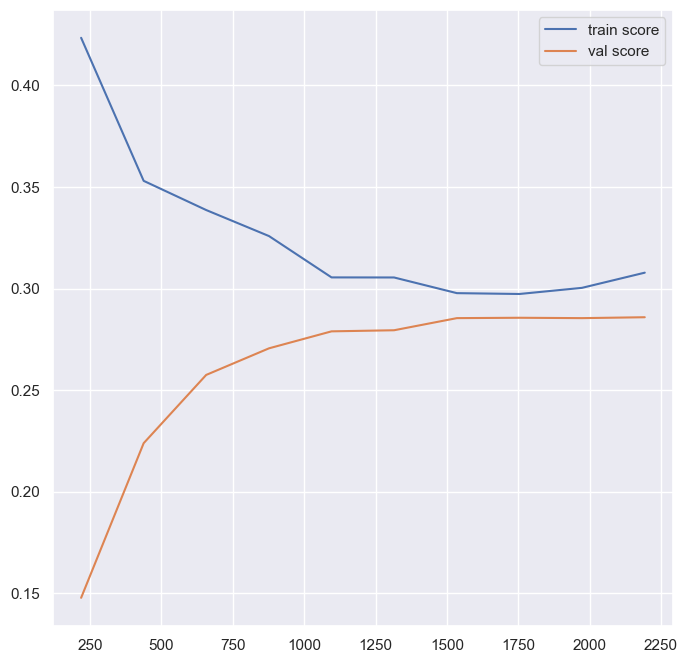

TreeReg
{'min_samples_leaf': 8} 

DecisionTreeRegressor(min_samples_leaf=8, random_state=3) 

R2 : 0.2893839379983362 

MAE : -0.6316093749484022 

RMSE : -0.6316093749484022 



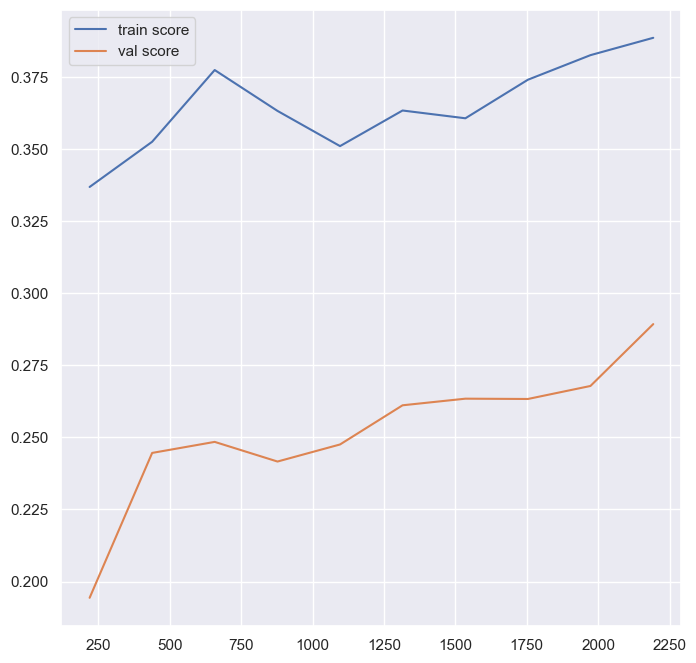

Forest_reg
{'min_samples_leaf': 6, 'n_estimators': 95} 

RandomForestRegressor(min_samples_leaf=6, n_estimators=95, random_state=3) 

R2 : 0.308727918225859 

MAE : -0.6232270183705307 

RMSE : -0.6232270183705307 



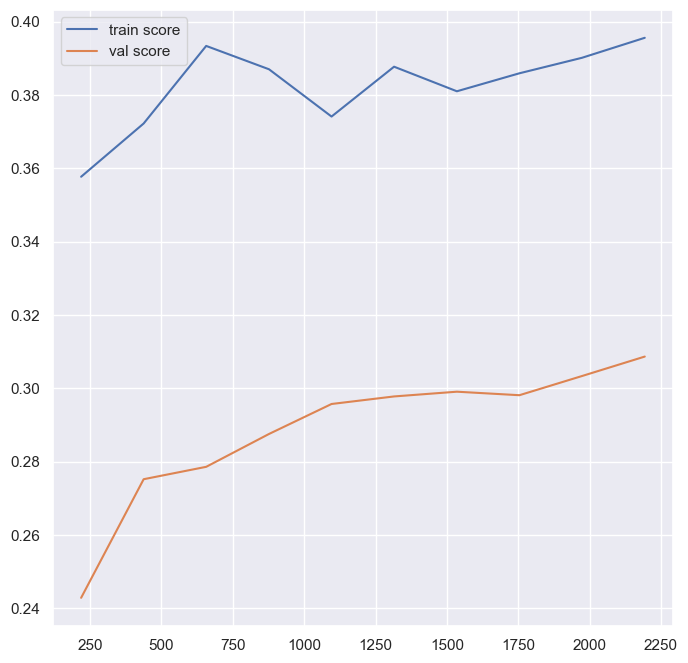

knn_reg
{'n_neighbors': 45} 

KNeighborsRegressor(n_neighbors=45) 

R2 : 0.27257500573223475 

MAE : -0.6387313049995028 

RMSE : -0.6387313049995028 



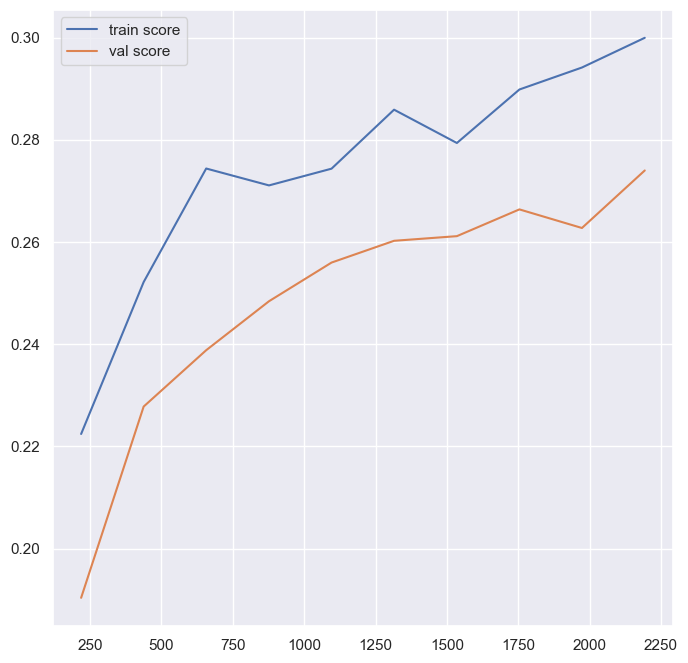

In [37]:
for model in models:
    print(model)
    models[model].fit(xtrain,ytrain)
    print(models[model].best_params_, '\n')
    print(models[model].best_estimator_, '\n')
    resultat = cross_validate(models[model].best_estimator_,xtrain, ytrain, cv=5, scoring=scores)
                              
    print('R2 :', resultat['test_R2'].mean(),'\n')
    print('MAE :', resultat['test_MAE'].mean(),'\n')
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    
    N, train_score, val_score = learning_curve(models[model].best_estimator_, xtrain, ytrain, cv= 5,
                                           scoring = 'r2',
                                          train_sizes = np.linspace(0.1, 1, 10))

    plt.figure(figsize=(8,8))
    plt.plot(N, train_score.mean(axis = 1), label='train score')
    plt.plot(N, val_score.mean(axis = 1), label='val score')
    plt.legend()
    plt.show()

In [38]:
from sklearn.feature_selection import RFECV

var_retenus_cat = []
score_finale_cat = []

for model in models:
    if model == 'knn_reg':
        break
    print(model)
    
    selector=RFECV(models[model].best_estimator_,cv=5, scoring='r2', n_jobs=5)
    selector = selector.fit(xtrain, ytrain)
    
    vars = xtrain.columns[selector.support_]
    print(vars)
    var_retenus_cat.append(vars.tolist())
    
    resultat = cross_validate(models[model].best_estimator_,xtrain[vars], ytrain, cv=5, scoring=scores)
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    score_finale.append({'R2':resultat['test_R2'].mean(), 'MAE':resultat['test_MAE'].mean(),'RMSE':resultat['test_RMSE'].mean()})
    
    resultat = cross_validate(models['knn_reg'].best_estimator_,xtrain[vars], ytrain, cv=5, scoring=scores)
    print('Avec KNN')
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')

Regression
Index(['CouncilDistrictCode_1', 'CouncilDistrictCode_2',
       'CouncilDistrictCode_3', 'CouncilDistrictCode_4',
       'CouncilDistrictCode_5', 'CouncilDistrictCode_7', 'BuildingType_CAMPUS',
       'BuildingType_MULTIFAMILY HR (10+)',
       'BuildingType_MULTIFAMILY LR (1-4)', 'BuildingType_SPS-DISTRICT K-12',
       'PrimaryPropertyType_LOW-RISE MULTIFAMILY', 'PrimaryPropertyType_OTHER',
       'Neighborhood_BALLARD', 'Neighborhood_CENTRAL', 'Neighborhood_DOWNTOWN',
       'Neighborhood_EAST', 'Neighborhood_GREATER DUWAMISH',
       'Neighborhood_MAGNOLIA / QUEEN ANNE', 'Neighborhood_NORTH',
       'Neighborhood_NORTHWEST', 'Neighborhood_SOUTHEAST',
       'Neighborhood_SOUTHWEST', 'LargestPropertyUseType_OTHER',
       'LargestPropertyUseType_PARKING', 'SecondLargestPropertyUseType_OFFICE',
       'SecondLargestPropertyUseType_OTHER',
       'ThirdLargestPropertyUseType_OFFICE',
       'ThirdLargestPropertyUseType_OTHER',
       'ThirdLargestPropertyUseType_PARKING',
 

In [39]:
#### Combinaison var_quant et var_cat

In [40]:
def global_preprocessing_first(df, target, features_cat, features_quant):
    df1 = first_preprocessing_var_cat(df, target, features_cat)
    df1 = pd.concat([df1,df[features_quant]], axis=1)    
    return df1

def global_preprocessing_last(df, target, features_cat, features_quant):
    X1, Y1 = last_preprocessing_var_cat(df, target, features_cat)
    X2, Y = preprocessing_quant(df, target, features_quant)
    X1.loc[:,var_quant] = X2
    #X = pd.concat([X1, X2], axis=1)
    return X1,Y

In [41]:
dm.shape

(3432, 40)

In [42]:
data = global_preprocessing_first(dm, var_target[0], var_cat, var_quant)
df_train, df_test = train_test_split(data, test_size=0.2, stratify=dm['group'], random_state=3)

In [43]:
data.shape

(3432, 49)

In [44]:
df_train.isna().sum()

SiteEnergyUse(kBtu)                            3
CouncilDistrictCode_1                          0
CouncilDistrictCode_2                          0
CouncilDistrictCode_3                          0
CouncilDistrictCode_4                          0
CouncilDistrictCode_5                          0
CouncilDistrictCode_7                          0
BuildingType_CAMPUS                            0
BuildingType_MULTIFAMILY HR (10+)              0
BuildingType_MULTIFAMILY LR (1-4)              0
BuildingType_MULTIFAMILY MR (5-9)              0
BuildingType_NONRESIDENTIAL                    0
BuildingType_NONRESIDENTIAL COS                0
BuildingType_SPS-DISTRICT K-12                 0
PrimaryPropertyType_LOW-RISE MULTIFAMILY       0
PrimaryPropertyType_MID-RISE MULTIFAMILY       0
PrimaryPropertyType_OTHER                      0
Neighborhood_BALLARD                           0
Neighborhood_CENTRAL                           0
Neighborhood_DOWNTOWN                          0
Neighborhood_EAST   

In [45]:
Xtrain, Ytrain = global_preprocessing_last(df_train, var_target[0], var_cat, var_quant)
Xtest, Ytest = global_preprocessing_last(df_test, var_target[0], var_cat, var_quant)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [46]:
Xtrain.isna().sum().sort_values(ascending=False)

CouncilDistrictCode_1                       0
CouncilDistrictCode_2                       0
Neighborhood_SOUTHEAST                      0
Neighborhood_SOUTHWEST                      0
LargestPropertyUseType_OTHER                0
LargestPropertyUseType_PARKING              0
LargestPropertyUseType_RETAIL STORE         0
SecondLargestPropertyUseType_OFFICE         0
SecondLargestPropertyUseType_OTHER          0
SecondLargestPropertyUseType_PARKING        0
ThirdLargestPropertyUseType_OFFICE          0
ThirdLargestPropertyUseType_OTHER           0
ThirdLargestPropertyUseType_PARKING         0
ThirdLargestPropertyUseType_RETAIL STORE    0
DefaultData_0                               0
ComplianceStatus_COMPLIANT                  0
YearBuilt                                   0
NumberofBuildings                           0
NumberofFloors                              0
PropertyGFATotal                            0
PropertyGFABuilding(s)                      0
LargestPropertyUseTypeGFA         

In [47]:
#### Standardisation
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scy = StandardScaler()

Xtrain.loc[:,:] = scx.fit_transform(Xtrain)
Xtest.loc[:,:]  = scx.transform(Xtest)

Ytrain = scy.fit_transform(Ytrain.values.reshape(-1, 1)).ravel()
Ytest = scy.transform(Ytest.values.reshape(-1, 1)).ravel()

### Performance sur les subsets RFECV quant+cat

In [48]:
##Selection des best features par REFCV

In [49]:
# Model libraires
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve

models={'Regression':GridSearchCV(LinearRegression(),{},
                                  cv=5, n_jobs=4, ),
        'Ridge':GridSearchCV(Ridge(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'Lasso':GridSearchCV(Lasso(),{'alpha':np.logspace(-3,3,10)},
                                  cv=5, n_jobs=4, ),
        'TreeReg':GridSearchCV(DecisionTreeRegressor(random_state=3),{'min_samples_leaf':range(20,41,2)},
                               cv=5,n_jobs=4, ),
        'Forest_reg':GridSearchCV(RandomForestRegressor(random_state=3),{'min_samples_leaf':range(2,41,2), 'n_estimators':range(2,97,5)},
                                  cv=5,n_jobs=6,),
        'knn_reg':GridSearchCV(KNeighborsRegressor(),{'n_neighbors':range(5,97,5)},
                                   cv=5,n_jobs=6,)
       }
scores = {'R2':'r2', 'MAE':'neg_mean_absolute_error', 'RMSE':'neg_mean_absolute_error'}

Regression
{} 

LinearRegression() 

R2 : 0.6976824040531614 

MAE : -0.38600388956535103 

RMSE : -0.38600388956535103 



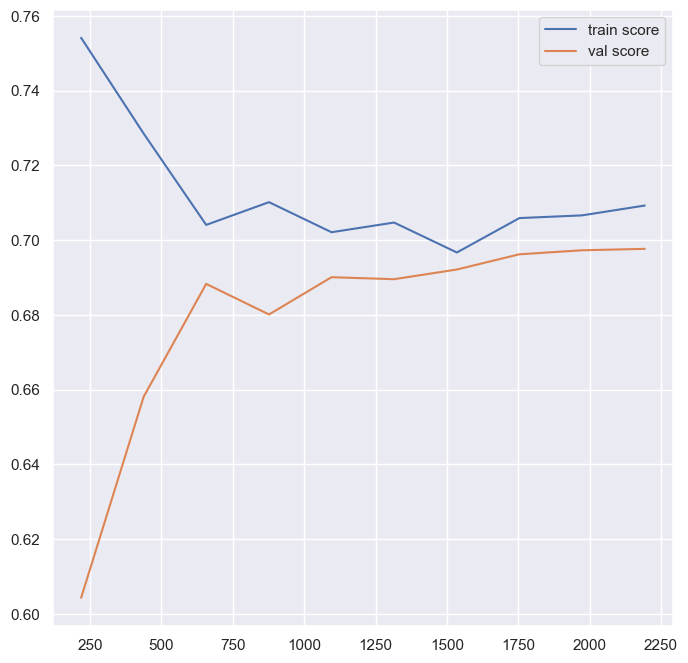

Ridge
{'alpha': 0.001} 

Ridge(alpha=0.001) 

R2 : 0.7075190158988356 

MAE : -0.3747391462594405 

RMSE : -0.3747391462594405 



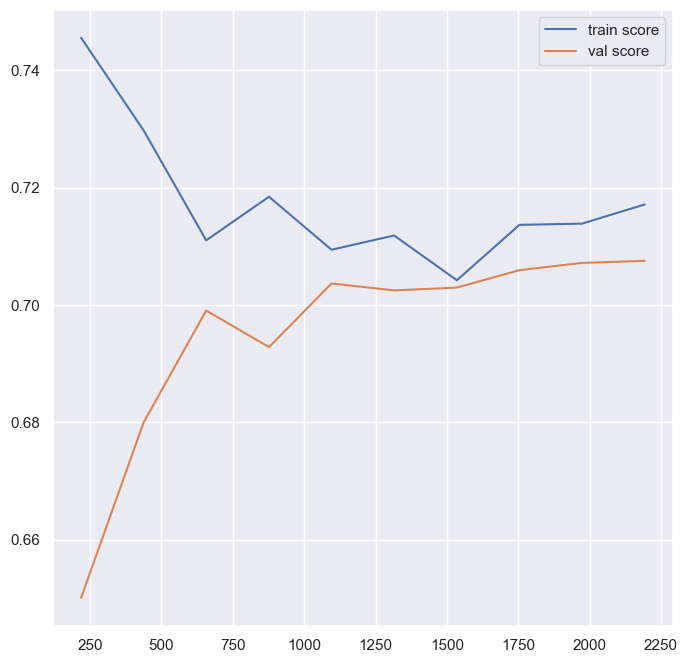

Lasso
{'alpha': 0.004641588833612777} 

Lasso(alpha=0.004641588833612777) 

R2 : 0.6991435157184803 

MAE : -0.3833833685697785 

RMSE : -0.3833833685697785 



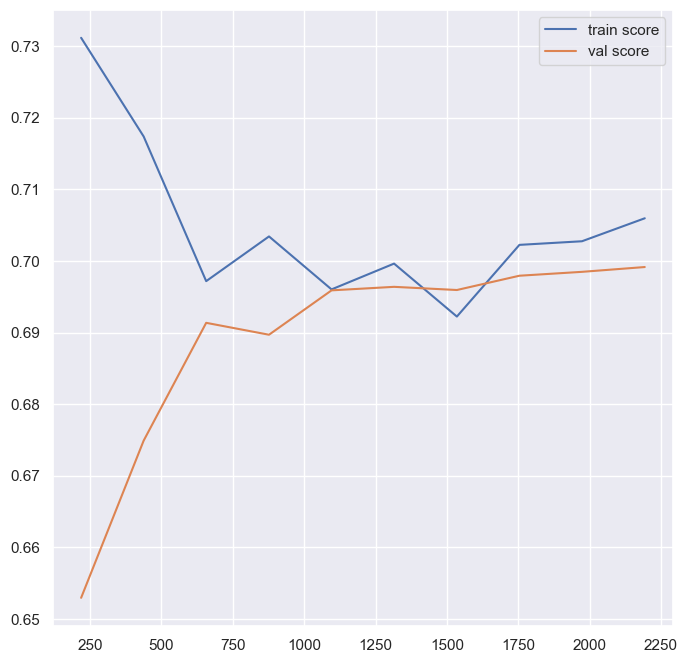

TreeReg
{'min_samples_leaf': 40} 

DecisionTreeRegressor(min_samples_leaf=40, random_state=3) 

R2 : 0.6731591937895434 

MAE : -0.39591089194233464 

RMSE : -0.39591089194233464 



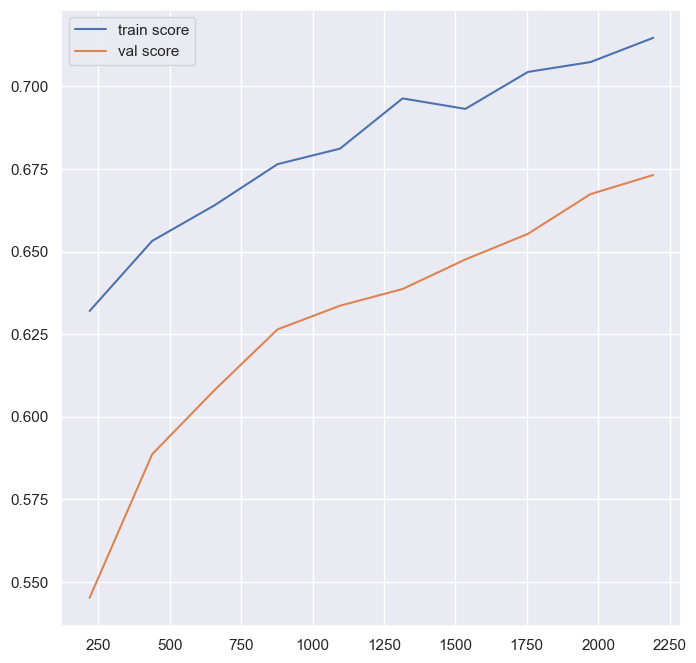

Forest_reg
{'min_samples_leaf': 2, 'n_estimators': 92} 

RandomForestRegressor(min_samples_leaf=2, n_estimators=92, random_state=3) 

R2 : 0.7085321603607826 

MAE : -0.366847987267978 

RMSE : -0.366847987267978 



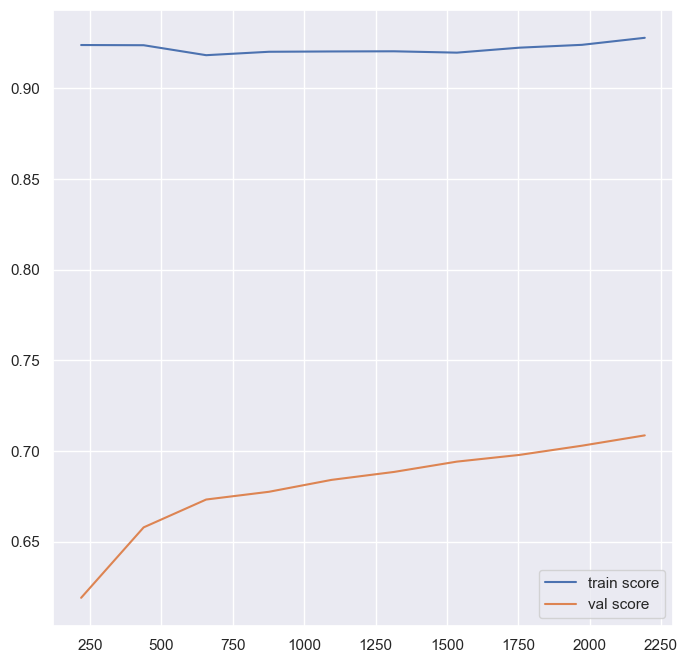

knn_reg
{'n_neighbors': 10} 

KNeighborsRegressor(n_neighbors=10) 

R2 : 0.5712555482226456 

MAE : -0.47123719766427136 

RMSE : -0.47123719766427136 



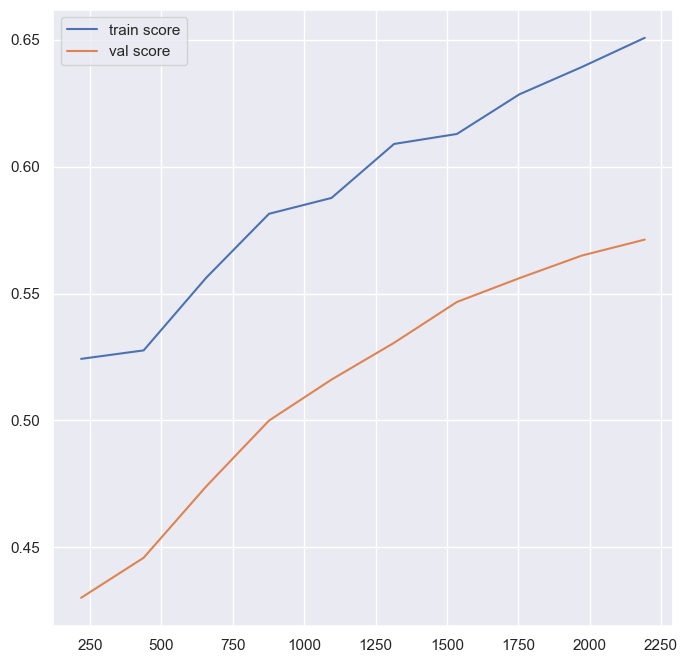

In [50]:
for i in range(len(models)):
    if i == len(models)-1:
        x = Xtrain
    else:
        x = Xtrain[var_retenus_quant[i]+ var_retenus_cat[i]]
    
    print(list(models.keys())[i])
    model = list(models.keys())[i]
    models[model].fit(x,Ytrain)
    print(models[model].best_params_, '\n')
    print(models[model].best_estimator_, '\n')
    resultat = cross_validate(models[model].best_estimator_,x, Ytrain, cv=5, scoring=scores)
                              
    print('R2 :', resultat['test_R2'].mean(),'\n')
    print('MAE :', resultat['test_MAE'].mean(),'\n')
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    
    N, train_score, val_score = learning_curve(models[model].best_estimator_, x, Ytrain, cv= 5,
                                           scoring = 'r2',
                                          train_sizes = np.linspace(0.1, 1, 10))

    plt.figure(figsize=(8,8))
    plt.plot(N, train_score.mean(axis = 1), label='train score')
    plt.plot(N, val_score.mean(axis = 1), label='val score')
    plt.legend()
    plt.show()
    

#### Réduction de variables

In [51]:
from sklearn.feature_selection import RFECV

var_retenus_all = []
score_finale_all = []

for i in range(len(models)):
    
    if i == len(models)-1:
        break
        
    print(list(models.keys())[i])
    model = list(models.keys())[i]
    
    x = Xtrain[var_retenus_quant[i]+ var_retenus_cat[i]]
    selector=RFECV(models[model].best_estimator_,cv=5, scoring='r2', n_jobs=5)
    
    selector = selector.fit(x, Ytrain)
    
    vars = x.columns[selector.support_]
    print(vars)
    print(len(vars))
    var_retenus_all.append(vars.tolist())
    
    resultat = cross_validate(models[model].best_estimator_,x[vars], Ytrain, cv=5, scoring=scores)
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')
    score_finale.append({'R2':resultat['test_R2'].mean(), 'MAE':resultat['test_MAE'].mean(),'RMSE':resultat['test_RMSE'].mean()})
    
    resultat = cross_validate(models['knn_reg'].best_estimator_,x[vars], Ytrain, cv=5, scoring=scores)
    print('Avec KNN')
    print('R2 :', resultat['test_R2'].mean(),)
    print('MAE :', resultat['test_MAE'].mean(),)
    print('RMSE :', resultat['test_RMSE'].mean() ,'\n')

Regression
Index(['PropertyGFATotal', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'CouncilDistrictCode_3', 'CouncilDistrictCode_7', 'BuildingType_CAMPUS',
       'PrimaryPropertyType_LOW-RISE MULTIFAMILY', 'PrimaryPropertyType_OTHER',
       'Neighborhood_CENTRAL', 'Neighborhood_EAST',
       'Neighborhood_GREATER DUWAMISH', 'Neighborhood_MAGNOLIA / QUEEN ANNE',
       'LargestPropertyUseType_PARKING', 'SecondLargestPropertyUseType_OTHER',
       'DefaultData_0', 'ComplianceStatus_COMPLIANT'],
      dtype='object')
17
R2 : 0.7011864887623316
MAE : -0.3837165006020549
RMSE : -0.3837165006020549 

Avec KNN
R2 : 0.6503603352880263
MAE : -0.4140121000901956
RMSE : -0.4140121000901956 

Ridge
Index(['PropertyGFATotal', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'CouncilDistrictCode_3',
       'CouncilDistrictCode_7', 'BuildingType_CAMPUS',
       'BuildingType_MULTIFAMILY LR (1-4)',
       'Build

In [52]:
#### Application des modèles sur test set

In [53]:
from sklearn.dummy import DummyRegressor
base_mean = DummyRegressor(strategy='mean')
base_med = DummyRegressor(strategy='median')

base_mean.fit(Xtrain, Ytrain)
base_med.fit(Xtrain, Ytrain)
y_alea = np.random.randint(np.min(Ytrain), np.max(Ytrain), Ytest.shape)

In [54]:
print('Avec une prédiction à la moyenne')
print('R2 :', r2_score(Ytest,base_mean.predict(Xtest)),)
print('MAE :', mean_absolute_error(Ytest,base_mean.predict(Xtest)),)
print('RMSE :',mean_squared_error(Ytest,base_mean.predict(Xtest), squared=False),'\n')

print('Avec une prédiction à la mediane')
print('R2 :', r2_score(Ytest,base_med.predict(Xtest)),)
print('MAE :', mean_absolute_error(Ytest,base_med.predict(Xtest)),)
print('RMSE :',mean_squared_error(Ytest,base_med.predict(Xtest), squared=False),'\n')

print('Avec une prédiction alétoire')
print('R2 :', r2_score(Ytest, y_alea))
print('MAE :', mean_absolute_error(Ytest,y_alea))
print('RMSE :',mean_squared_error(Ytest,y_alea, squared=False), '\n')

Avec une prédiction à la moyenne
R2 : -0.0003436263884530888
MAE : 0.792152400135114
RMSE : 1.0197982848812992 

Avec une prédiction à la mediane
R2 : -0.026176223000060617
MAE : 0.7843870969256811
RMSE : 1.0328818508278657 

Avec une prédiction alétoire
R2 : -5.008868740445978
MAE : 2.1038635106472054
RMSE : 2.4994015289118416 



In [57]:
for i in range(len(models)):

    print(list(models.keys())[i])
    model = list(models.keys())[i]
    
    if i == len(models)-1:
        i = i-3
    x = Xtrain[var_retenus_all[i]]
    
    models[model].fit(x,Ytrain)
    models['knn_reg'].fit(x,Ytrain)
    
    print(models[model].best_params_)
    print(models[model].best_estimator_,'\n')
                              
    print('R2 :', r2_score(Ytest,models[model].best_estimator_.predict(Xtest[var_retenus_all[i]])),)
    print('MAE :', mean_absolute_error(Ytest,models[model].best_estimator_.predict(Xtest[var_retenus_all[i]])),)
    print('RMSE :',mean_squared_error(Ytest,models[model].best_estimator_.predict(Xtest[var_retenus_all[i]]), squared=False),'\n')
    
    print('Avec une knn')
    print('R2 :', r2_score(Ytest,models['knn_reg'].best_estimator_.predict(Xtest[var_retenus_all[i]])),)
    print('MAE :', mean_absolute_error(Ytest,models['knn_reg'].best_estimator_.predict(Xtest[var_retenus_all[i]])),)
    print('RMSE :',mean_squared_error(Ytest,models['knn_reg'].best_estimator_.predict(Xtest[var_retenus_all[i]]), squared=False),'\n')
        
    print('*********************************')


Regression
{}
LinearRegression() 

R2 : 0.6817385954921735
MAE : 0.4048797976333382
RMSE : 0.5752169301967628 

Avec une knn
R2 : 0.6161167333045058
MAE : 0.4326902347267814
RMSE : 0.6317412907901441 

*********************************
Ridge
{'alpha': 10.0}
Ridge(alpha=10.0) 

R2 : 0.6988608669277643
MAE : 0.39204619964985876
RMSE : 0.5595298629413133 

Avec une knn
R2 : 0.6375152909930266
MAE : 0.42422928367266527
RMSE : 0.613881461035789 

*********************************
Lasso
{'alpha': 0.001}
Lasso(alpha=0.001) 

R2 : 0.6832342684636055
MAE : 0.4009568942030108
RMSE : 0.5738637193216365 

Avec une knn
R2 : 0.6482863846531606
MAE : 0.41656065873260467
RMSE : 0.6046920556203598 

*********************************
TreeReg
{'min_samples_leaf': 40}
DecisionTreeRegressor(min_samples_leaf=40, random_state=3) 

R2 : 0.6572561583872747
MAE : 0.4139926299448187
RMSE : 0.5969315074851514 

Avec une knn
R2 : 0.6578575396224586
MAE : 0.4129871643576894
RMSE : 0.5964075870366761 

*************